<a href="https://colab.research.google.com/github/apriilbee/SIT719/blob/master/6_1P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.4-py3-none-any.whl size=200479 sha256=c5c91efadda364868159f87de5465e0f181c634838b1449c9121448eb6e5af89
  Stored in directory: /root/.cache/pip/wheels/cb/54/28/d02f62720600bc815c41219efedd0cb86889737fb5ea3c8f9a
Successfully built pyod


In [10]:
# 1. Import K-Nearest Neighbors model from Python Outlier Detection (pyod) library
# This model is an anomaly detection algorithm that identifies outliers based on distance to nearest neighbors
from pyod.models.knn import KNN

# 2. Import generate_data from pyod utils
# This function generates synthetic data for training and testing anomaly detection models, mimicking real-world datasets with normal
# and anomalous data.
# Additional import: evaluate_print (this function evaluates performance metrics and prints them)
from pyod.utils.data import generate_data, evaluate_print

# 3. Import visualize from pyod utils
# Built-in PyOD visualization tool that shows data points (highlights inliers and outliers)
from pyod.utils.example import visualize

In [4]:
contamination = 0.1 # 4. Represents outliers
n_train = 200 # 5. Number of data points in training set
n_test = 100 #6. Number of data points in test set

In [6]:
# 7. Creates the training and test set using generate_data
# It includes feature values (X) and their corresponding labels (y) indicating normal or anomalous data
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test,n_features=2, contamination=contamination,random_state=42)

In [7]:
# 8. It assigns a name to the model, initializes the KNN algorithm which flags
# distant points as anomalies based on their nearest neighbors,
# and trains it using the training data.
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# If we want to use other methods, we can simply replace the model with another PyOD algorithm,
# as they follow the same interface. For example:

# from pyod.models.iforest import IForest
# clf_name = 'IForest'
# clf = IForest()

# from pyod.models.auto_encoder import AutoEncoder
# clf_name = 'AutoEncoder'
# clf = AutoEncoder()

# from pyod.models.lof import LOF
# clf_name = 'LOF'
# clf = LOF()

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [13]:
# 9. Fix issues in below code

# Labels_ and decision_scores_ are undefined and will raise an error unless
# they were manually defined or extracted earlier (which they weren’t in this case).
y_train_pred = clf.predict(X_train)
y_train_scores = clf.decision_scores_

# Use y_test_pred and X_test to run the model using test data
y_test_pred = clf.predict(X_test) # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test) # outlier scores

In [14]:
# 10. Prints performance metrics such as accuracy, precision, recall for the training data.
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)

# Prints performance metrics for test data
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


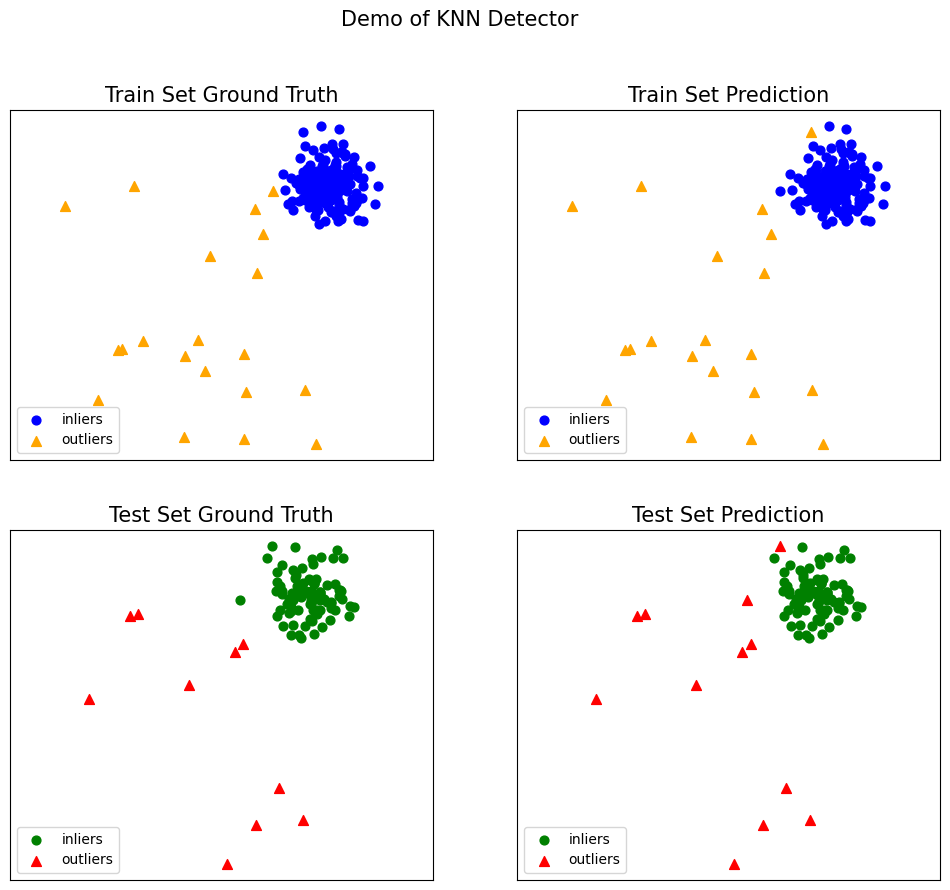

In [15]:
#11. Visualizes the decision boundary and how well the model separates inliers and outliers on both training and test data.
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
y_test_pred, show_figure=True, save_figure=True)

**Personal Reflection**

Understanding PyOD made it clear how flexible anomaly detection can be. KNN stood out because it flags outliers based on how far they are from their nearest neighbors which is simple but effective. Once I understood contamination and decision scores, switching to other models like Isolation Forest or AutoEncoder was easy.

Also, seeing the actual output was kind of surprising—in a good way. The ROC and precision scores were almost perfect, which showed me how well KNN can perform on synthetic data (as expected). Of course, I know real-world data won’t be this clean, but still, it gave me a good baseline and a bit of confidence that I understood the workflow correctly.